## PROSPER LOAN DATA EXPLORATION

I will be exploring the Loan data set of Prosper which was founded in 2005 as the first peer to peer lending market place in the United States. This data set contains 113,937 loans with 81 variables on each
loan.

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
sb.set_style('darkgrid')
sb.set_palette("bright", 10)
%matplotlib inline

In [2]:
# Read prosper csv file
prosper = pd.read_csv('prosperLoanData (1).csv')

In [3]:
# View first few rows of the dataframe
prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# See if there are any null values
prosper.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [5]:
# Get summary info of columns
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
# Get info of nulls in columns
prosper.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null bool
ListingNumber                          113937 non-null bool
ListingCreationDate                    113937 non-null bool
CreditGrade                            113937 non-null bool
Term                                   113937 non-null bool
LoanStatus                             113937 non-null bool
ClosedDate                             113937 non-null bool
BorrowerAPR                            113937 non-null bool
BorrowerRate                           113937 non-null bool
LenderYield                            113937 non-null bool
EstimatedEffectiveYield                113937 non-null bool
EstimatedLoss                          113937 non-null bool
EstimatedReturn                        113937 non-null bool
ProsperRating (numeric)                113937 non-null bool
ProsperRating (Alpha)                  113937 non

In [7]:
# Get the number of rows and columns
prosper.shape

(113937, 81)

In [8]:
# Check for duplicate listings
prosper.duplicated('ListingKey').sum()

871

In [9]:
# Remove duplicate listings
prosper.drop_duplicates(subset='ListingKey', inplace=True)

In [10]:
# Confirm duplicates removed
prosper.shape

(113066, 81)

In [11]:
# Get summary descriptive statistics of the dataframe
pd.set_option('display.max_columns',81)
prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.130660e+05,113066.000000,113041.000000,113066.000000,113066.000000,83982.000000,83982.000000,83982.000000,83982.000000,83982.000000,113066.000000,105441.000000,112475.000000,112475.000000,105462.000000,105462.000000,112369.000000,113066.000000,113066.000000,112369.000000,111907.000000,112369.000000,105444.000000,112076.000000,112369.000000,105462.000000,1.054620e+05,105462.000000,105522.000000,105522.000000,105522.000000,105522.000000,104594.000000,1.130660e+05,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,21923.000000,18912.000000,113066.000000,16952.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000,113066.000000
mean,6.248036e+05,40.800170,0.218980,0.192946,0.182882,0.168870,0.080417,0.096246,4.068705,5.952871,2.776838,96.060584,685.524961,704.524961,10.307058,9.248336,26.746380,6.959466,397.820998,1.438600,5.590812,0.595129,986.818434,4.158892,0.312764,0.015209,1.759230e+04,0.561088,11208.182028,23.221518,0.885552,0.802089,0.276032,5.605120e+03,1.420472,22.932263,22.269033,0.614514,0.048488,8452.830631,2929.190167,-3.229537,153.991403,16.268464,32.121770,69044.527992,8314.762307,271.932742,4209.236052,3125.487227,1083.748825,-55.019639,-14.350991,705.842206,686.669798,25.336372,0.998573,0.048379,0.023641,16.678249,80.876143
std,3.273262e+05,10.421518,0.080483,0.074917,0.074612,0.068607,0.046851,0.030475,1.675442,2.373897,3.998188,94.432241,66.635895,66.635895,5.458196,5.021249,13.643731,4.629303,447.657266,2.444093,6.446342,1.984234,7156.683653,10.163465,0.728792,0.154691,3.294590e+04,0.318189,19847.681185,11.875303,0.148428,1.097975,0.553738,7.495596e+03,0.763711,19.248708,18.828595,2.446576,0.557171,7389.362099,3804.772154,50.063023,467.919931,9.005898,29.978915,38800.158867,6237.007841,192.549979,4798.081994,4076.877459,1185.533024,60.794092,109.645216,2396.901814,2365.467115,276.708803,0.017987,0.333580,0.233296,295.674170,103.340277
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.000000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,3.976670e+05,3

### UNIVARIATE EXPLORATION

#### Lets see the distributions of some of the columns

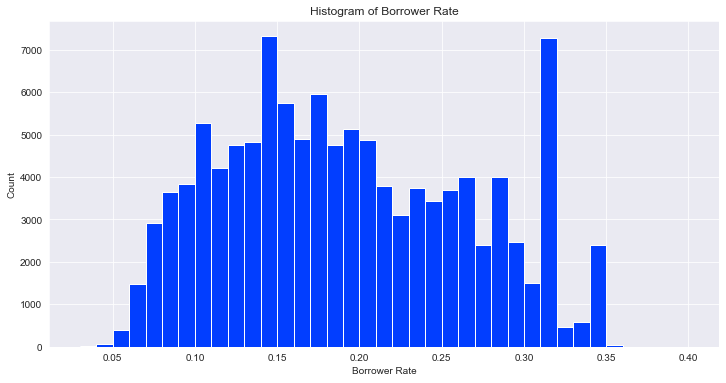

In [12]:
# Plot histogram of borrower rate to see distribution
plt.figure(figsize = [12, 6])
#plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(0.03, 0.4+0.01, 0.01)
plt.hist(data = prosper, x = 'BorrowerRate', bins=bins)
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.title('Histogram of Borrower Rate');

Bins are set at 0.01 and the distribution is unimodal. Most of the Borrower Rate are concentrated between 0.1 and 0.2. There is also another lower concentration between 0.2 and 0.3. A borrower rate a little above 0.3 has the highest values. We will check it out later

In [13]:
# Get maximum lender yield
prosper.LenderYield.max()

0.4925

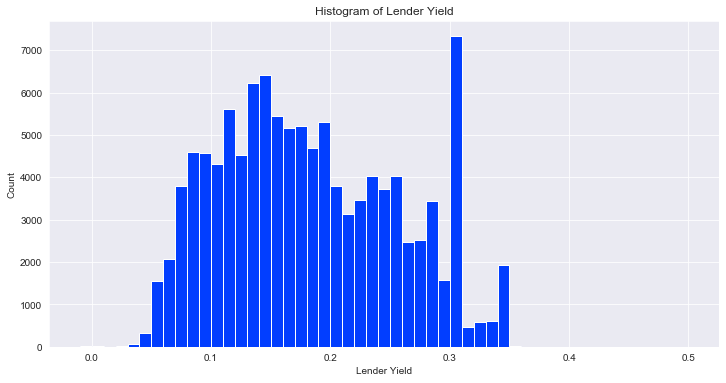

In [14]:
# Plot histogram of Lender yield to see distribution
plt.figure(figsize = [12, 6])
#plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(-0.01, 0.5+0.01, 0.01)
plt.hist(data = prosper, x = 'LenderYield', bins=bins)
plt.xlabel('Lender Yield')
plt.ylabel('Count')
plt.title('Histogram of Lender Yield');

Bins are set at 0.01 and the distribution is unimodal. Most of the Lender yield values are concentrated from 0.08 and 0.2. There is also another lower concentration between 0.2 and 0.3. 

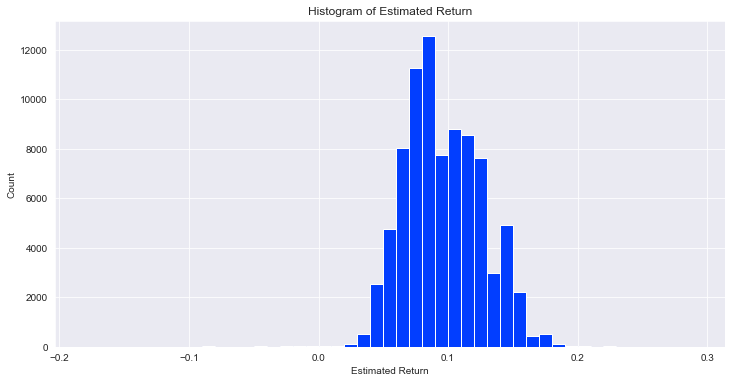

In [15]:
# Plot histogram of Estimated return to see distribution
plt.figure(figsize = [12, 6])
#plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(-0.18, 0.29+0.01, 0.01)
plt.hist(data = prosper, x = 'EstimatedReturn', bins=bins)
plt.xlabel('Estimated Return')
plt.ylabel('Count')
plt.title('Histogram of Estimated Return');


The histogram of the estimated yield is unimodal. Most values are concentrated between 0.03 and 0.16. We cant do a log transform because there are negative values 

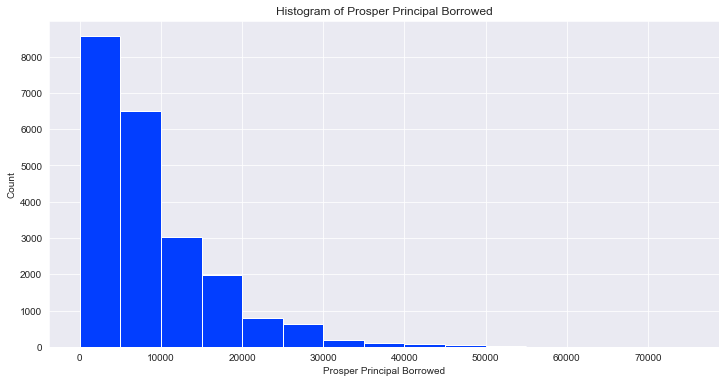

In [16]:
# Plot histogram of Prosper Principal Borrowed to see distribution
plt.figure(figsize = [12, 6])
bins = np.arange(0, 72499+5000, 5000)
plt.hist(data = prosper, x = 'ProsperPrincipalBorrowed', bins=bins)
plt.xlabel('Prosper Principal Borrowed')
plt.ylabel('Count')
plt.title('Histogram of Prosper Principal Borrowed');

The distribution is skewed to the right. Most loans principals are below 30000 with only a fraction above 30000. 

In [17]:
prosper.LoanOriginalAmount.max()

35000

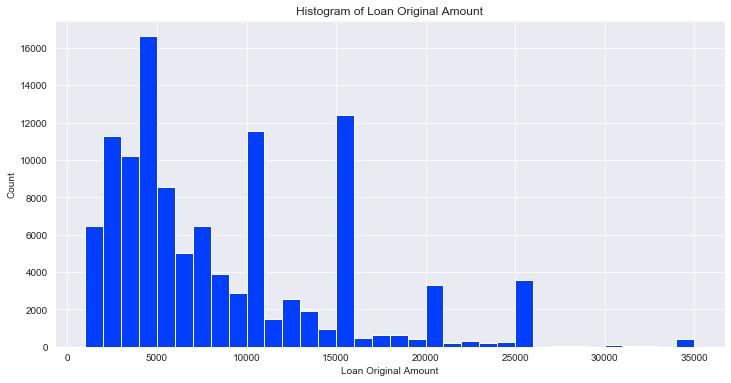

In [18]:
# Plot histogram of Loan Original Amount to see distribution
plt.figure(figsize = [12, 6])
bins = np.arange(1000, 35000+1000, 1000)
plt.hist(data = prosper, x = 'LoanOriginalAmount', bins=bins)
plt.xlabel('Loan Original Amount')
plt.ylabel('Count')
plt.title('Histogram of Loan Original Amount');

The distribution of the Loan amount is skewed to the right. 5000 has the most loans

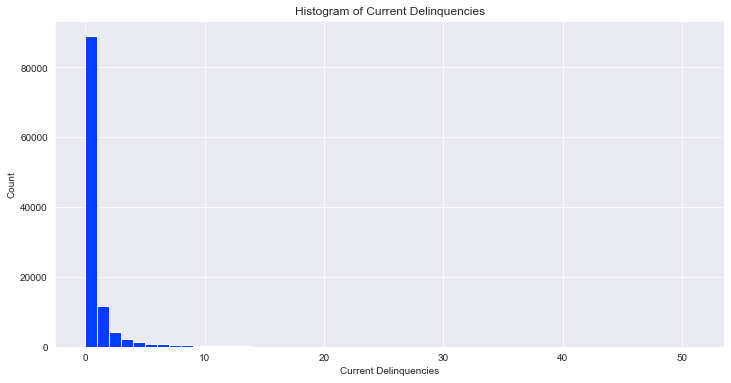

In [19]:
# Plot histogram of Current delinquencies
plt.figure(figsize = [12, 6])
bins = np.arange(0, 51+1, 1)
plt.hist(data = prosper, x = 'CurrentDelinquencies', bins=bins)
plt.xlabel('Current Delinquencies')
plt.ylabel('Count')
plt.title('Histogram of Current Delinquencies');

The histogram of deliquencies is heavily skewed to the right. I chose the bins to be able to see more values but they are so small compared to the others. I would have done a log10 tranform but we have 0 values.

In [20]:
prosper.IncomeRange.value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

I will restrict my income ranges to those from 1 to 100k plus

In [21]:
# Convert income range column to categorical type
level_order = ['$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ord_cat = pd.api.types.CategoricalDtype(ordered=True, categories=level_order)
prosper.IncomeRange = prosper.IncomeRange.astype(ord_cat)

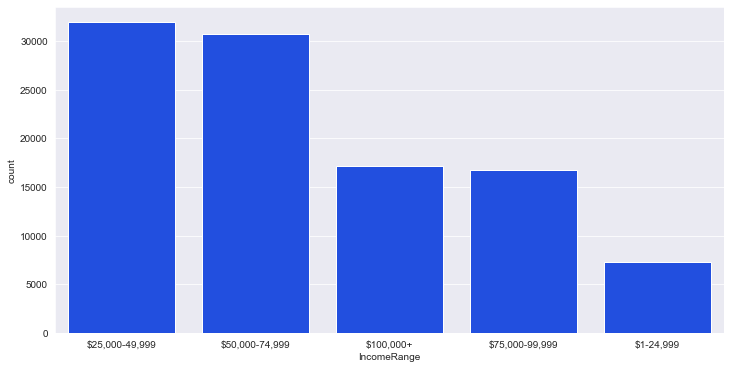

In [22]:
# Plot bar chart of income range
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
cat_order = prosper['IncomeRange'].value_counts().index
sb.countplot(data = prosper, x = 'IncomeRange', color = base_color, order = cat_order);

The income range 25k to 49k has the highest while 1k to 24k has the lowest

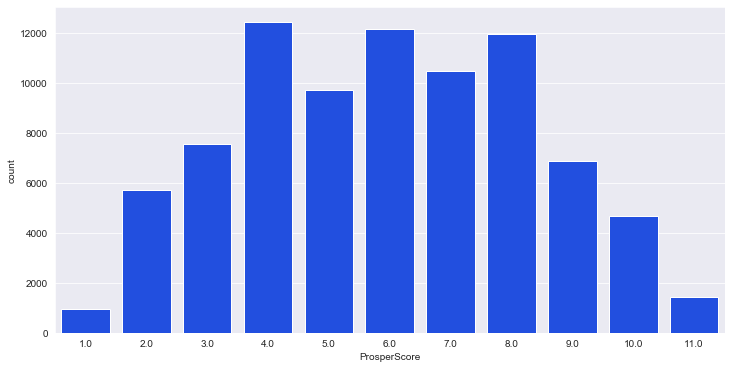

In [23]:
# Prosper score barplot
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = prosper, x = 'ProsperScore', color = base_color);

Prosper scores are concentrated between 4 and 8.

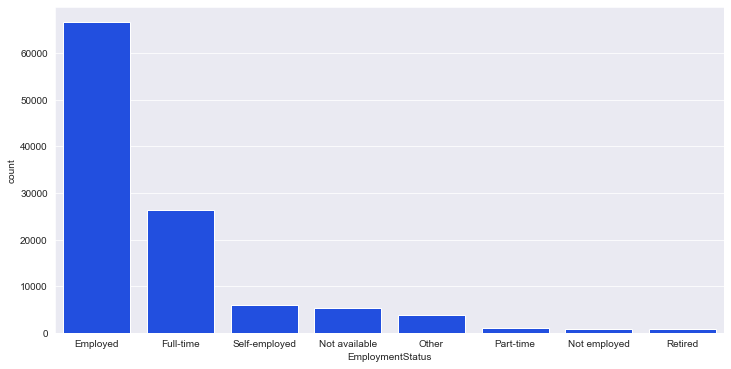

In [24]:
# Listing Employment Status barplot
plt.figure(figsize = [12, 6])
cat_order = prosper['EmploymentStatus'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data = prosper, x = 'EmploymentStatus', color = base_color, order=cat_order);

Obviously the employed and those with full time employment are the highest number of loans

In [25]:
# I want to see the occupations of loan seekers
prosper.Occupation.value_counts()[:10]

Other                       28422
Professional                13531
Computer Programmer          4442
Executive                    4280
Teacher                      3729
Administrative Assistant     3677
Analyst                      3578
Sales - Commission           3414
Accountant/CPA               3209
Clerical                     3135
Name: Occupation, dtype: int64

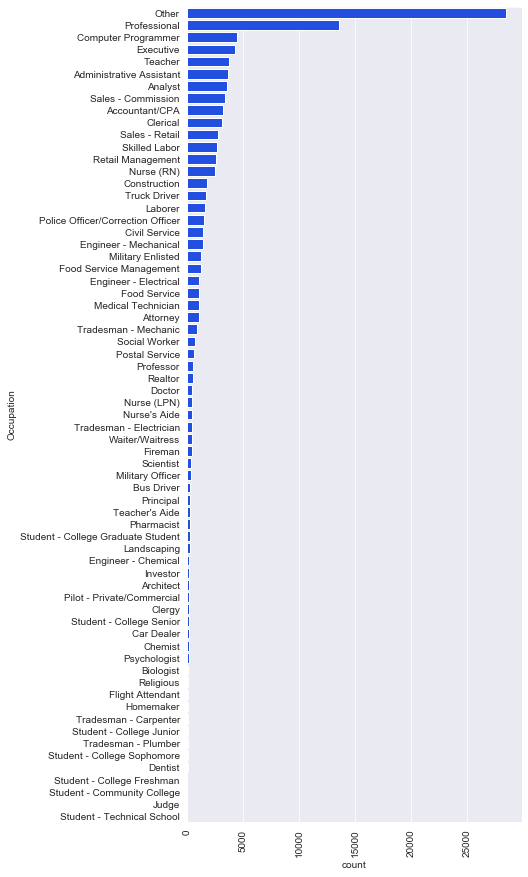

In [26]:
# Plot occupation barplot
plt.figure(figsize = [6, 15])
cat_order = prosper['Occupation'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data = prosper, y = 'Occupation', color = base_color, order=cat_order);
plt.xticks(rotation=90);

Those listed as other have highest number of occupations followed by professional. Students are at the tail end of occupations listed

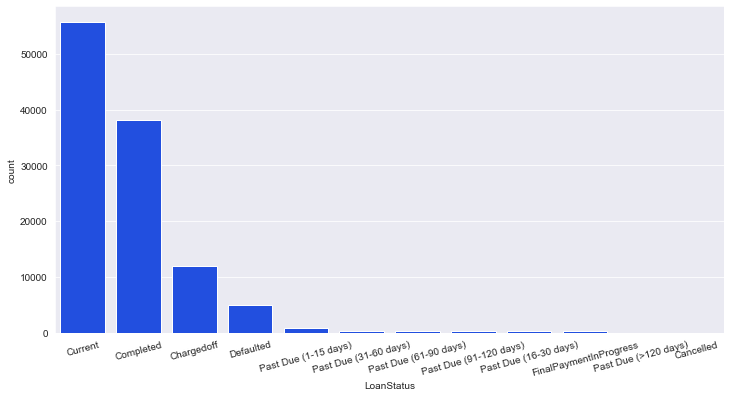

In [27]:
# Convert Loan Status to categorical data type
prosper.LoanStatus = prosper.LoanStatus.astype('category')
# Listing Category barplot
plt.figure(figsize = [12, 6])
cat_order = prosper['LoanStatus'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data = prosper, x = 'LoanStatus', color = base_color, order=cat_order)
plt.xticks(rotation=15);

In [28]:
prosper.groupby('LoanStatus').mean().LenderYield

LoanStatus
Cancelled                 0.178400
Chargedoff                0.224656
Completed                 0.176599
Current                   0.174003
Defaulted                 0.212097
FinalPaymentInProgress    0.186679
Past Due (1-15 days)      0.220940
Past Due (16-30 days)     0.225258
Past Due (31-60 days)     0.222888
Past Due (61-90 days)     0.230422
Past Due (91-120 days)    0.228292
Past Due (>120 days)      0.242712
Name: LenderYield, dtype: float64

Current loans are the highest. There is also an impressive number of completed loans

### BIVARIATE EXPLORATION

#### Now lets explore the various relationships between columns in dataframe

In [29]:
#prosper.corr()
# Lets check other columns correlation with Current delinquency
pd.set_option('display.max_columns',81)
prosper[prosper.columns[1:81]].corrwith(prosper['CurrentDelinquencies'])

ListingNumber                 -0.233141
Term                          -0.083719
BorrowerAPR                    0.149254
BorrowerRate                   0.176404
LenderYield                    0.171712
                                 ...   
PercentFunded                  0.005255
Recommendations                0.022350
InvestmentFromFriendsCount     0.013195
InvestmentFromFriendsAmount    0.015253
Investors                     -0.088104
Length: 64, dtype: float64

Doesnt look like there is any moderate or strong correlation

### What factors contribute to loan deliquency?

I will be exploring various variables to see their relationships with current delinquencies

#### What are the average delinquencies across incomes?

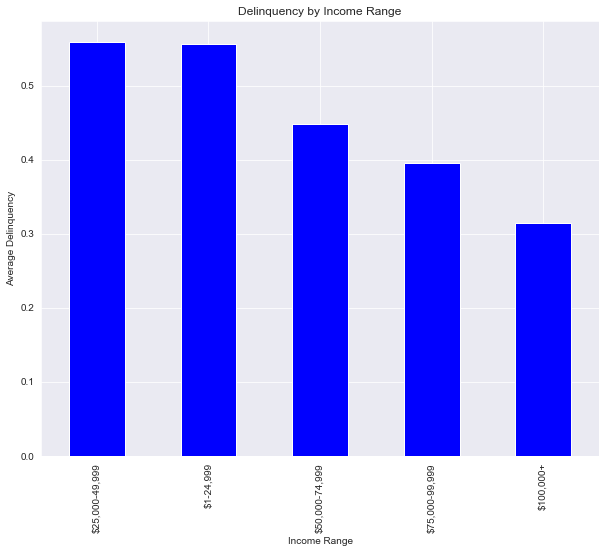

In [30]:
# Lets see how deliquency fares by income range
# Group by income range
income_del = prosper.groupby('IncomeRange').mean().CurrentDelinquencies.sort_values(ascending=False)
income_del
# Plot bar chart
plt.figure(figsize = [10, 8])
income_del.plot(kind="bar", color="blue")
plt.title('Delinquency by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Average Delinquency');

In [31]:
income_del

IncomeRange
$25,000-49,999    0.559059
$1-24,999         0.556124
$50,000-74,999    0.447606
$75,000-99,999    0.395471
$100,000+         0.315238
Name: CurrentDelinquencies, dtype: float64

The lower incomes have the highest delinquencies while the higher incomes have the lowest delinquencies. 

#### Get delinquencies by state

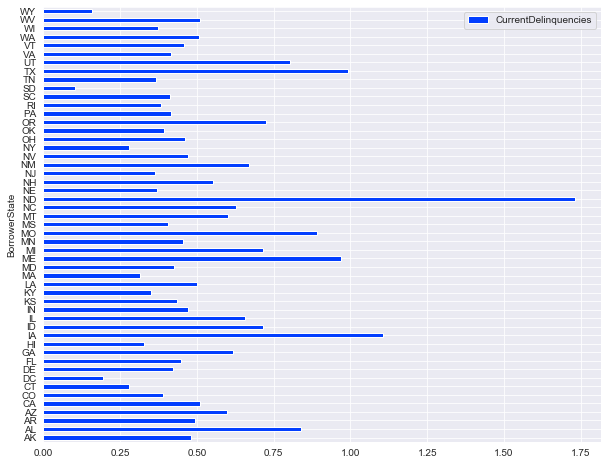

In [32]:
# Delinquent loans by borrower state
#Convert to categorical
prosper.BorrowerState = prosper.BorrowerState.astype('category')
state_del2 = (prosper.pivot_table(index='BorrowerState', values='CurrentDelinquencies', aggfunc='mean', dropna=True ))
state_del2.plot(kind='barh', stacked=False, figsize=(10,8));

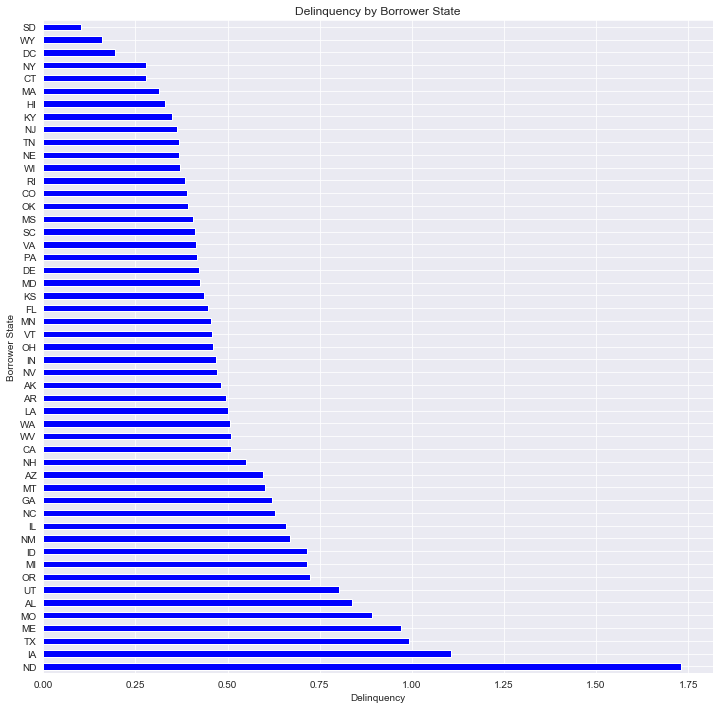

In [33]:
# Delinquent loans by borrower state


# Plot delinquencies by state
state_del = prosper.groupby('BorrowerState').mean().CurrentDelinquencies.sort_values(ascending=False)
#state_del.dropna(inplace=True)
plt.figure(figsize = [12, 12])
state_del.plot(kind="barh", color="blue")
plt.title('Delinquency by Borrower State')
plt.xlabel('Delinquency')
plt.ylabel('Borrower State');

North Carolina has the highest delinquencies with an average of 47.9% delinquency while South Dakota has the lowest with only 10.12%.

#### How do Loan Categories fare with delinquencies?

In [34]:
# Rename Listing Category column
prosper.rename(columns={"ListingCategory (numeric)" : "ListingCategory"}, inplace = True)

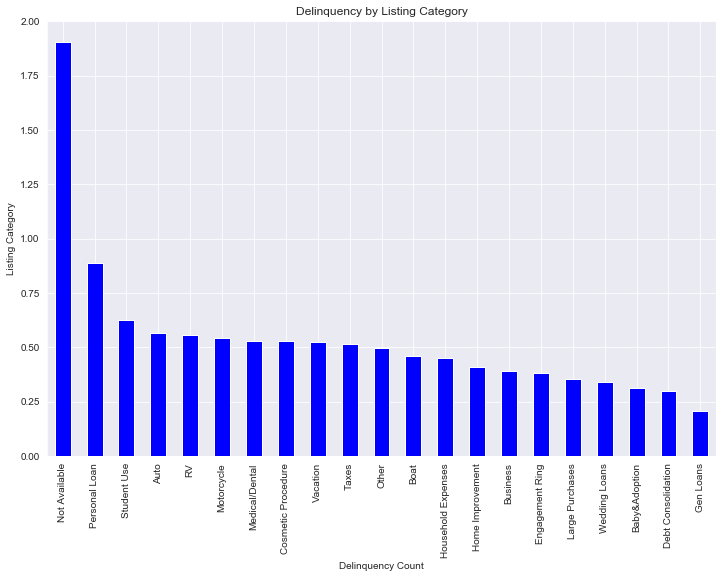

In [35]:
# Change listing type to category
listing_type = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 
                4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7: 'Other', 8: 'Baby&Adoption',
                9: 'Boat', 10: 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Gen Loans', 
                13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 
                17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}
prosper['ListingCategory'].replace(listing_type, inplace=True)
prosper.ListingCategory = prosper.ListingCategory.astype('category')

cat_delq = prosper.groupby('ListingCategory').mean().CurrentDelinquencies.sort_values(ascending=False)
plt.figure(figsize = [12, 8])
cat_delq.plot(kind="bar", color="blue")
plt.title('Delinquency by Listing Category')
plt.xlabel('Delinquency Count')
plt.ylabel('Listing Category');

In [36]:
cat_delq

ListingCategory
Not Available         1.905493
Personal Loan         0.889214
Student Use           0.624339
Auto                  0.566030
RV                    0.557692
Motorcycle            0.542763
Medical/Dental        0.528202
Cosmetic Procedure    0.527473
Vacation              0.526178
Taxes                 0.517007
Other                 0.495453
Boat                  0.458824
Household Expenses    0.448918
Home Improvement      0.407608
Business              0.393182
Engagement Ring       0.383178
Large Purchases       0.352260
Wedding Loans         0.339895
Baby&Adoption         0.311224
Debt Consolidation    0.299632
Gen Loans             0.206897
Name: CurrentDelinquencies, dtype: float64

From the bar chart we can see that the most delinquent Listing category are RV and Auto with 56.79%. The lowest are the Not available category with only 10%.

In [37]:
# def bivariate_proportions(facet_col,x_col):
#     '''
#     Takes a column, x_col, and shows its values' proportions broken down by a seperate columns, facet_col. 
#     '''
#     plt.figure(figsize = [20, len(prosper[facet_col].cat.categories)+4])

#     i=1
#     for grade in prosper[facet_col].cat.categories:

#         plt.subplot(math.ceil(len(prosper[facet_col].cat.categories)/4),4,i)
#         n_points = prosper[prosper[facet_col] == grade].shape[0]


#         # generate tick mark locations and names
#         tick_props = np.arange(0, 1.05, 0.05)
#         tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#         # create the plot
#         base_color = sb.color_palette()[0]
#         sb.countplot(data=prosper[prosper[facet_col] == grade], x = x_col, color = base_color)
        
#         plt.xticks(rotation=45)
        
#         plt.yticks(tick_props * n_points, tick_names)
        
#         plt.ylabel('proportion')
#         plt.title(grade)
#         plt.tight_layout()
#         i += 1;

In [38]:
# bivariate_proportions('ListingCategory','CurrentDelinquencies')

#### How about Loan terms?

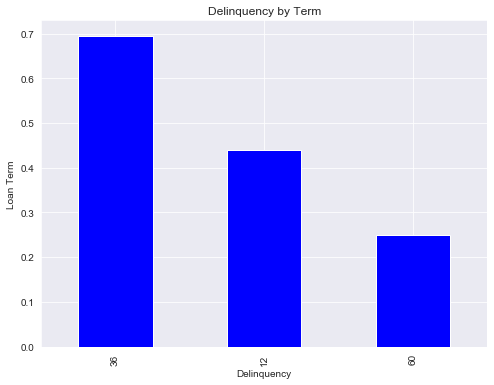

In [39]:
# Delinquency by loan term
# Convert loan term to categorical data type
#level = ['12', '36', '60']
#cat = pd.api.types.CategoricalDtype(ordered=True, categories=level)
prosper.Term = prosper.Term.astype('category')

term_del = prosper.groupby('Term').mean().CurrentDelinquencies.sort_values(ascending=False)
plt.figure(figsize = [8, 6])
term_del.plot(kind="bar", color="blue");
plt.title('Delinquency by Term')
plt.xlabel('Delinquency')
plt.ylabel('Loan Term');

36 month loans are most delinquent. Its extraordinary that 36 month loans have a delinquency rate of almost 70%

#### Total Prosper Loans?

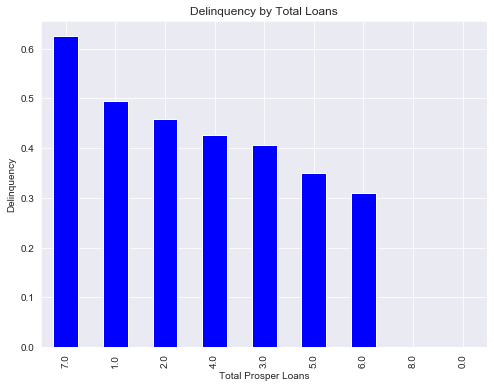

In [40]:
# Delinquency by number of loans
loans_del = prosper.groupby('TotalProsperLoans').mean().CurrentDelinquencies.sort_values(ascending=False)
plt.figure(figsize = [8, 6])
loans_del.plot(kind="bar", color="blue");
plt.title('Delinquency by Total Loans')
plt.xlabel('Total Prosper Loans')
plt.ylabel('Delinquency');

In [41]:
loans_del

TotalProsperLoans
7.0    0.625000
1.0    0.495237
2.0    0.458685
4.0    0.426150
3.0    0.406141
5.0    0.349515
6.0    0.310345
8.0    0.000000
0.0    0.000000
Name: CurrentDelinquencies, dtype: float64

Those with 7 prosper loans have a very high delinquency rate of 62.5%. The others are in the 40% range. While 8 has 0%. 

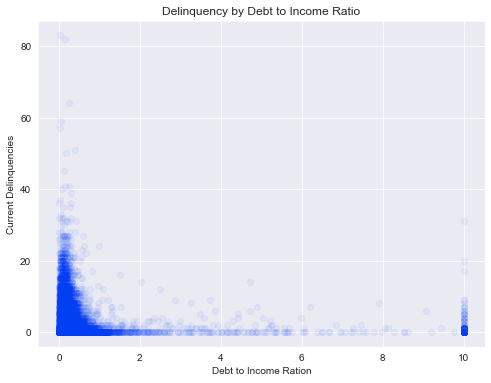

In [42]:
# Relationship between Debt to Income Ratio with Delinquencies
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='DebtToIncomeRatio', y='CurrentDelinquencies', alpha=1/20)
plt.title('Delinquency by Debt to Income Ratio')
plt.xlabel('Debt to Income Ration')
plt.ylabel('Current Delinquencies');

#### Borrower Rate Relationship with Delinquencies

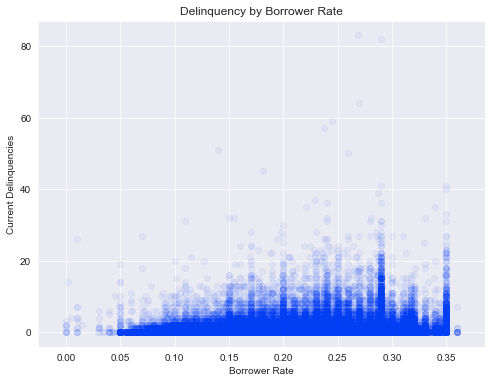

In [43]:
# Relationship between Borrower rate and Delinquencies
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='BorrowerRate', y='CurrentDelinquencies', alpha=1/20)
plt.title('Delinquency by Borrower Rate')
plt.xlabel('Borrower Rate')
plt.ylabel('Current Delinquencies');

As the Borrower rate increase, the delinquency is also increasing showing a good positive relationship.

#### Principal Borrowed

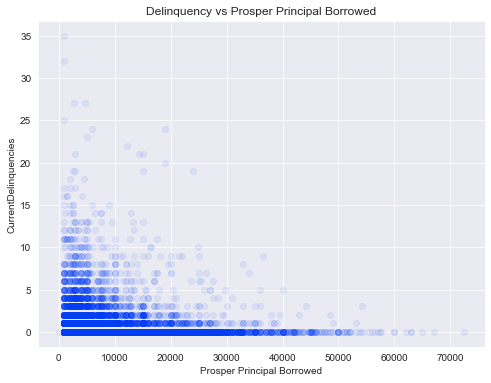

In [44]:
# Relationship between Principal  and Current Delinquencies
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='ProsperPrincipalBorrowed', y='CurrentDelinquencies', alpha=1/15);
plt.title('Delinquency vs Prosper Principal Borrowed')
plt.xlabel('Prosper Principal Borrowed')
plt.ylabel('CurrentDelinquencies');

The relationship between the Principal Borrowed and Current Delinquencies is a negative one. As the Principal Borrowed increased, the rate of Delinquency reduced. Higher value loans are less delinquent

#### Whats the effect of time on Delinquencies?

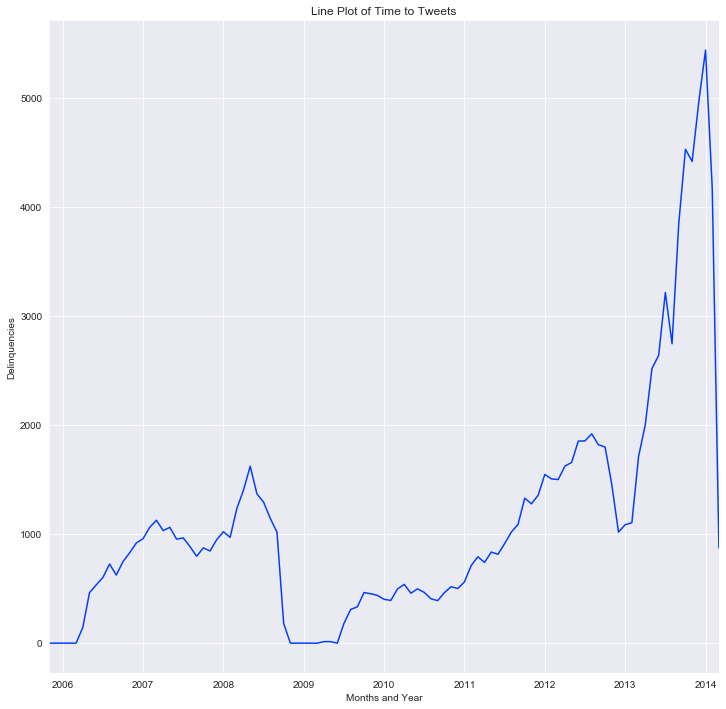

In [45]:
# Delinquencies by year
#Convert Listing creation date to datetime
prosper.ListingCreationDate =  pd.to_datetime(prosper['ListingCreationDate'])
# Get number of tweets per month
month_del = prosper.groupby(pd.Grouper(key='ListingCreationDate', freq='M')).count().CurrentDelinquencies
month_del.plot(kind='line', figsize=(12,12))
plt.xlabel('Months and Year')
plt.ylabel('Delinquencies')
plt.title('Line Plot of Time to Tweets');

Delinquencies were on the rise from 2006 up to sometime in 2008. They then dropped up to 2009 before rising consistently up till 2012 when it dipped again. It continued to rise in 2013.


We have seen relationships between Current Delinquencies and Income range, state, listing category, term, total prosper loans, debt to income ratio, borrower rate, principal borrowed and listing date.
The relationship between Income Range and Current Delinquencies is most interesting to me. I will add other variables to get more insight in the multivariate analysis

### Multivariate Analysis

#### Add other variables to Income Range and Current Delinquencies

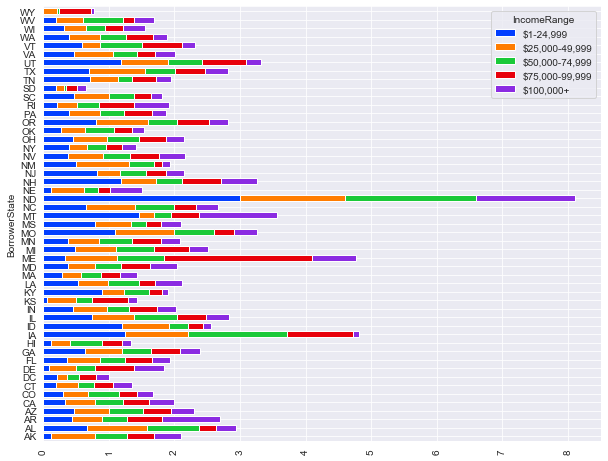

In [46]:
# Lets add Income Range to the Delinquencies by State
bic = (prosper.pivot_table(index='BorrowerState', columns='IncomeRange', values='CurrentDelinquencies', aggfunc='mean'))
bic.plot(kind='barh', stacked=True, figsize=(10,8), width= 0.7)
plt.xticks(rotation=90);

This doesnt look like a good idea. Have to find a better way to visualize this

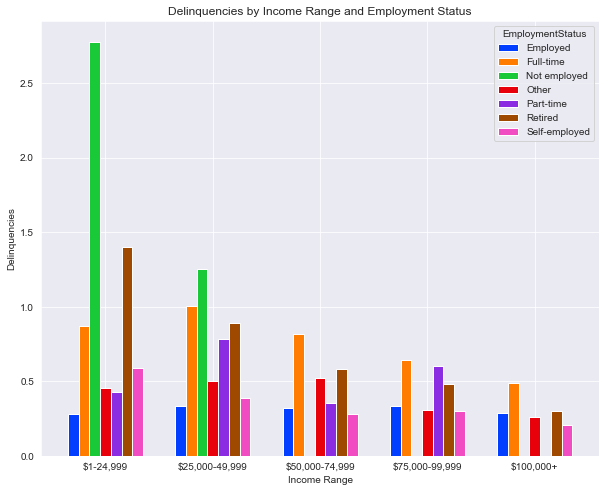

In [47]:
# Lets add Employement status to the Delinquencies by Income range
iec = (prosper.pivot_table(index='IncomeRange', columns='EmploymentStatus', values='CurrentDelinquencies', aggfunc='mean'))
iec.plot(kind='bar', stacked=False, figsize=(10,8), width= 0.7)
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Delinquencies')
plt.title('Delinquencies by Income Range and Employment Status');

Urgh. All the percentages are messed up. There doesnt seem to be any stand out trend. Will come back to this later

#### Home Ownership?

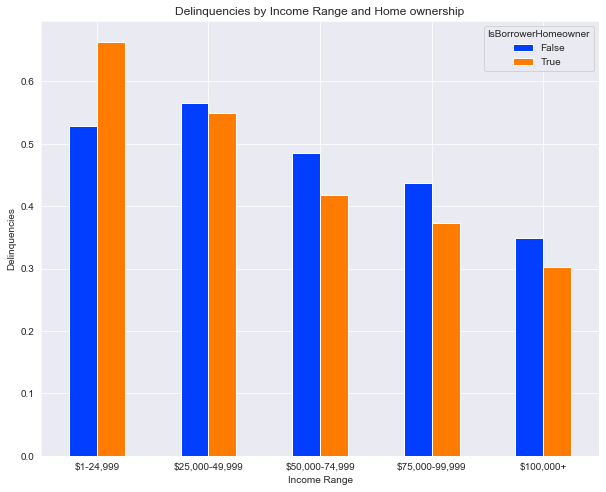

In [48]:
# Lets add Homeowner status to the Delinquencies by Income range
iic = (prosper.pivot_table(index='IncomeRange', columns='IsBorrowerHomeowner', values='CurrentDelinquencies', aggfunc='mean', dropna=True))
iic.plot(kind='bar', stacked=False, figsize=(10,8))
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Delinquencies')
plt.title('Delinquencies by Income Range and Home ownership');

#### Groups?

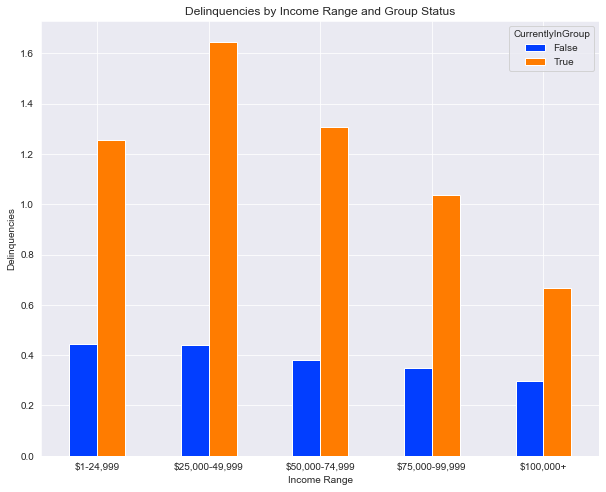

In [49]:
# Lets add Group status to the Delinquencies by Income range
icc = (prosper.pivot_table(index='IncomeRange', columns='CurrentlyInGroup', values='CurrentDelinquencies', aggfunc='mean'))
icc.plot(kind='bar', stacked=False, figsize=(10,8))
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Delinquencies')
plt.title('Delinquencies by Income Range and Group Status');

Those in groups are overwhelminly more deliquent that those not in groups across majority income streams

#### Loan Term?

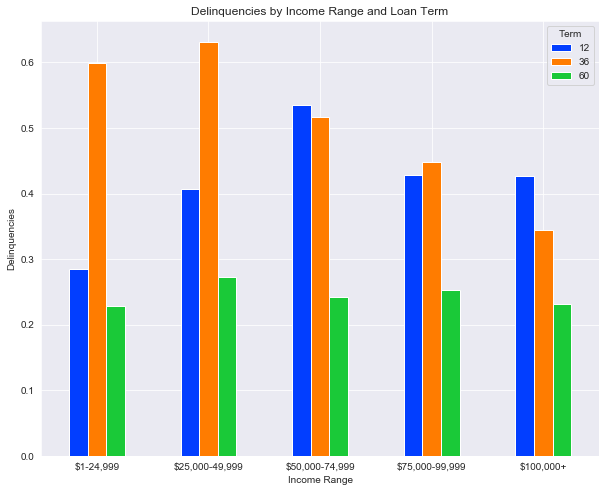

In [50]:
# Lets add loan Term to the Delinquencies by Income range
itc = (prosper.pivot_table(index='IncomeRange', columns='Term', values='CurrentDelinquencies', aggfunc='mean'))
itc.plot(kind='bar', stacked=False, figsize=(10,8))
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Delinquencies')
plt.title('Delinquencies by Income Range and Loan Term');

The 12 and 36 month terms are the most delinquent in all income groups. The least delinquent in the majority of income groups is the 60 month loan term. 

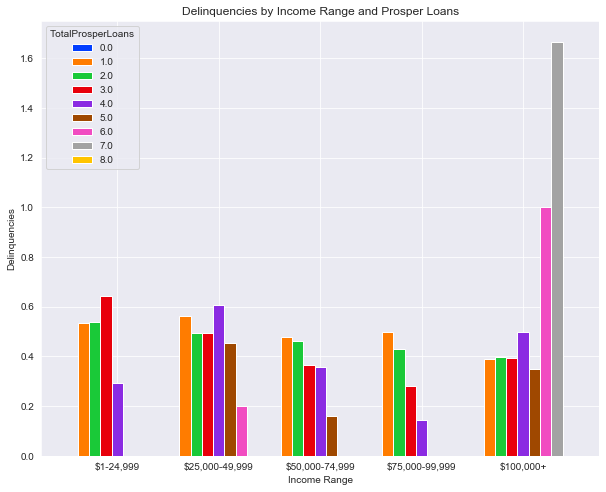

In [51]:
# Lets add Total Prosper loans to the Delinquencies by Income range

income_loan_del = (prosper.pivot_table(index='IncomeRange', columns='TotalProsperLoans', values='CurrentDelinquencies', aggfunc='mean'))
income_loan_del.plot(kind='bar', stacked=False, figsize=(10,8), width=1)
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Delinquencies')
plt.title('Delinquencies by Income Range and Prosper Loans');

More of a mixed bag doesnt seem like any standouts except in the no income range

In [52]:
prosper.BorrowerRate.value_counts()

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1314
          ... 
0.2717       1
0.1732       1
0.1704       1
0.1786       1
0.1721       1
Name: BorrowerRate, Length: 2294, dtype: int64

In [53]:
# # Lets add Employement status to the Delinquencies by Income range
# tde = (prosper.pivot_table(index='IncomeRange', columns='ProsperPrincipalBorrowed', values='CurrentDelinquencies', aggfunc='sum'))
# tde.plot(kind='bar', stacked=False, figsize=(10,8))
# plt.xticks(rotation=90);

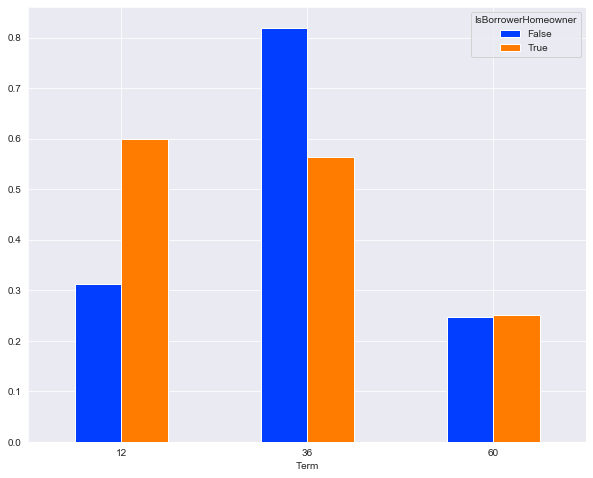

In [54]:
# Lets see the relationship between Loan terms and delinquencies by home ownership
tic = (prosper.pivot_table(index='Term', columns='IsBorrowerHomeowner', values='CurrentDelinquencies', aggfunc='mean'))
tic.plot(kind='bar', stacked=False, figsize=(10,8))
plt.xticks(rotation=0);

36 month term loans are the most delinquent for non home owners. The home owners have more delinquencies in 12 and 60 month. 

#### Principal Borrowed?

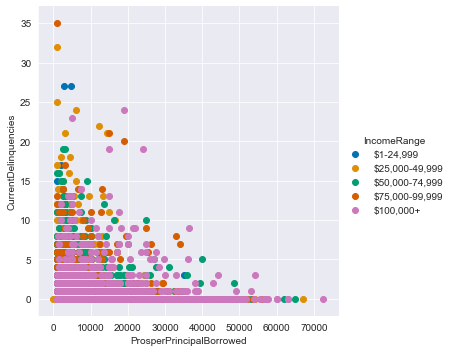

In [55]:
# Principal borrowed and Deliquencies by Income Range
g = sb.FacetGrid(data = prosper, hue = 'IncomeRange', height = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'ProsperPrincipalBorrowed', 'CurrentDelinquencies')
g.add_legend();

The above scatter plot seems confusing. Lets try a different approach

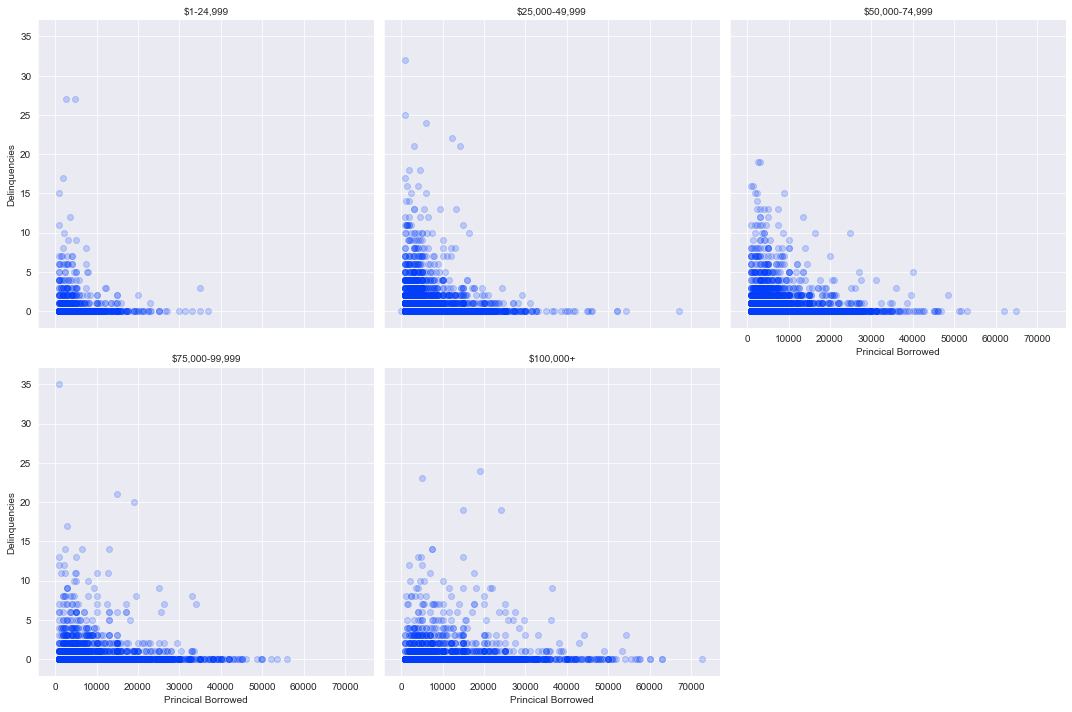

In [56]:
# Principal borrowed and Deliquencies by Income Range
g = sb.FacetGrid(data = prosper, col = 'IncomeRange', height = 5, col_wrap = 3, margin_titles = True, dropna=True)
g.map(plt.scatter, 'ProsperPrincipalBorrowed', 'CurrentDelinquencies', alpha = 1/5);
g.set_ylabels('Delinquencies')
g.set_xlabels('Princical Borrowed')
g.set_titles('{col_name}');

Principal borrowed and Deliquencies by Income Range have a negative relationship even after the Income Range is added as a 3rd variable. As the principal borrowed increases, delinquency reduces. The $0 income range has few entries so its difficult to make conclusions

### What factors affect outcome of lenders yield?

In [57]:
#The prosper score is rated between 1 - 10. Remove all that dont fall into that category
prosper = prosper.query('ProsperScore <= 10')

In [58]:
# Convert Prosper score to categorical data type
prosper.ProsperScore = prosper.ProsperScore.astype('category')

C:\Users\max\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### What are the correlation of Lender yield with other variable?

In [59]:
# Lets check other columns correlation with Prosper score
pd.set_option('display.max_rows',81)
prosper[prosper.columns[0:81]].corrwith(prosper['LenderYield'])

ListingNumber                         -0.301640
BorrowerAPR                            0.993155
BorrowerRate                           0.999996
LenderYield                            1.000000
EstimatedEffectiveYield                0.891112
EstimatedLoss                          0.943671
EstimatedReturn                        0.810922
ProsperRating (numeric)               -0.951602
EmploymentStatusDuration              -0.038810
IsBorrowerHomeowner                   -0.121965
CurrentlyInGroup                       0.015016
CreditScoreRangeLower                 -0.504073
CreditScoreRangeUpper                 -0.504073
CurrentCreditLines                    -0.102785
OpenCreditLines                       -0.120508
TotalCreditLinespast7years            -0.028435
OpenRevolvingAccounts                 -0.135176
OpenRevolvingMonthlyPayment           -0.069750
InquiriesLast6Months                   0.254615
TotalInquiries                         0.175720
CurrentDelinquencies                   0

#### How many Loan listings do we get per year

In [60]:
# Extract year from listing date and add new column to listing date
prosper['year'] = prosper['ListingCreationDate'].dt.year

C:\Users\max\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
prosper.year.value_counts()

2013    33917
2012    19556
2011    11442
2014     9928
2010     5530
2009     2178
Name: year, dtype: int64

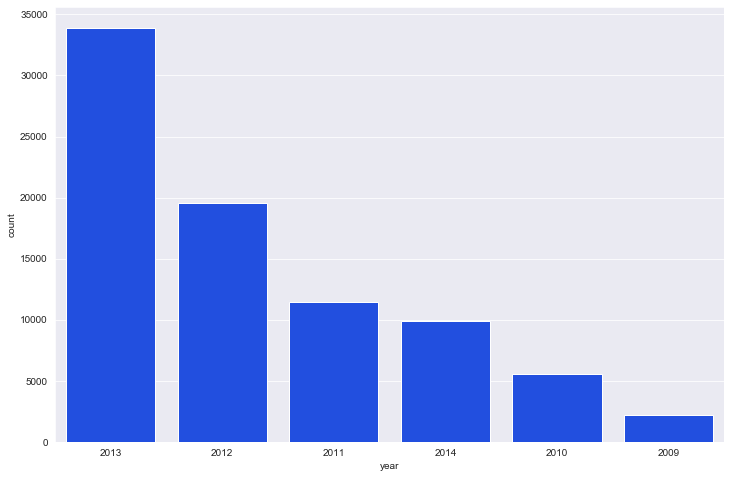

In [62]:
# Plot year barplot
plt.figure(figsize = [12, 8])
cat_order = prosper['year'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data = prosper, x = 'year', color = base_color, order=cat_order);
plt.xticks(rotation=0);

2009 had the least loan listing while 2013 had the most. The listings have been growing year on year up to 2013

#### How does the income range affect lender Yield?

In [63]:
prosper.groupby('IncomeRange').mean().LenderYield

IncomeRange
$1-24,999         0.228103
$25,000-49,999    0.204659
$50,000-74,999    0.184349
$75,000-99,999    0.175420
$100,000+         0.163691
Name: LenderYield, dtype: float64

No handles with labels found to put in legend.


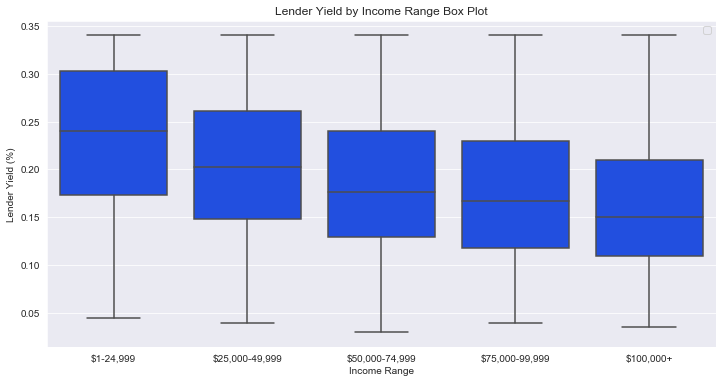

In [64]:
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosper, x = 'IncomeRange', y = 'LenderYield', color = base_color)
plt.xticks(rotation=0)
plt.xlabel('Income Range')
plt.ylabel('Lender Yield (%)')
plt.title('Lender Yield by Income Range Box Plot')
plt.legend(loc=0);

The Lender yield decreases as the income range increases

#### Relationship with Prosper Score?

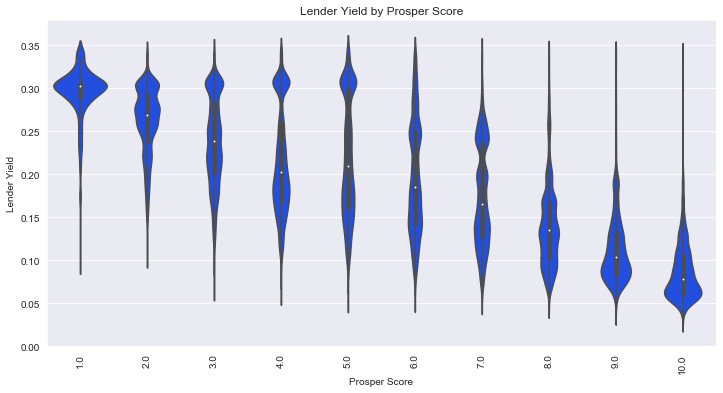

In [65]:
# Prosper score and Lender yield
plt.figure(figsize = [12, 6])
sb.violinplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', color = base_color)
plt.xticks(rotation=90)
plt.title('Lender Yield by Prosper Score')
plt.xlabel('Prosper Score')
plt.ylabel('Lender Yield');

The lower the Prosper Score the higher the Lenders Yield and the higher the Prosper score the lower the yield. Riskier loans have higher lender yields

#### Now check how employment status affects lender yield

In [66]:
#Convert to categorical
prosper.EmploymentStatus = prosper.EmploymentStatus.astype('category')
prosper.EmploymentStatus.value_counts()

C:\Users\max\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Employed         65246
Full-time         7912
Self-employed     4413
Other             3708
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

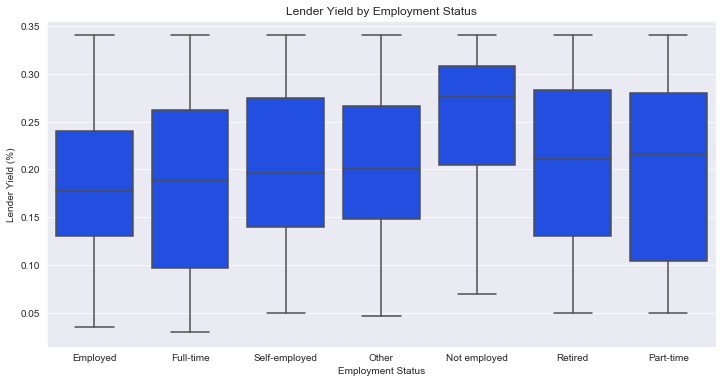

In [67]:
# Plot box plot for Lender yield by Employment Status
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
cat_order = prosper['EmploymentStatus'].value_counts().index
sb.boxplot(data = prosper, x = 'EmploymentStatus', y = 'LenderYield', color = base_color, order=cat_order)
plt.xticks(rotation=0)
plt.xlabel('Employment Status')
plt.ylabel('Lender Yield (%)')
plt.title('Lender Yield by Employment Status');

The employed offer the lowest yields while the not employed offer the highest yields. Riskier loans offer higher yields

#### Borrower Rate?

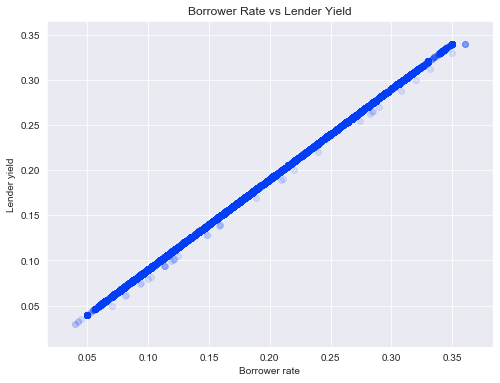

In [68]:
# Relationship between Borrower rate  and Lender yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='BorrowerRate', y='LenderYield', alpha=1/9);
plt.xlabel('Borrower rate')
plt.ylabel('Lender yield')
plt.title('Borrower Rate vs Lender Yield');

Shows a strong positive relationship where lender yield increases with borrower rate increase. As the borrower rate increased, the Lender yield increased.
Lets quickly see how Prosper score interacts with borrower rate

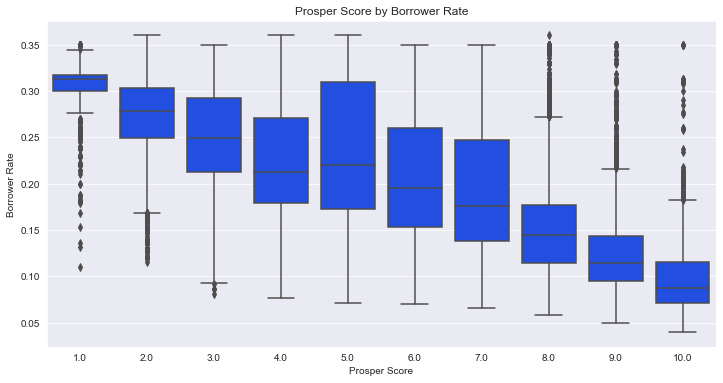

In [69]:
# Relationship between borrower  rate and prosper score
plt.figure(figsize = [12, 6])
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'BorrowerRate', color = base_color)
plt.xticks(rotation=0)
plt.title('Prosper Score by Borrower Rate')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower Rate');

Borrower Rate reduces as prosper score increase

#### How is lender yield distributed among the various categories?

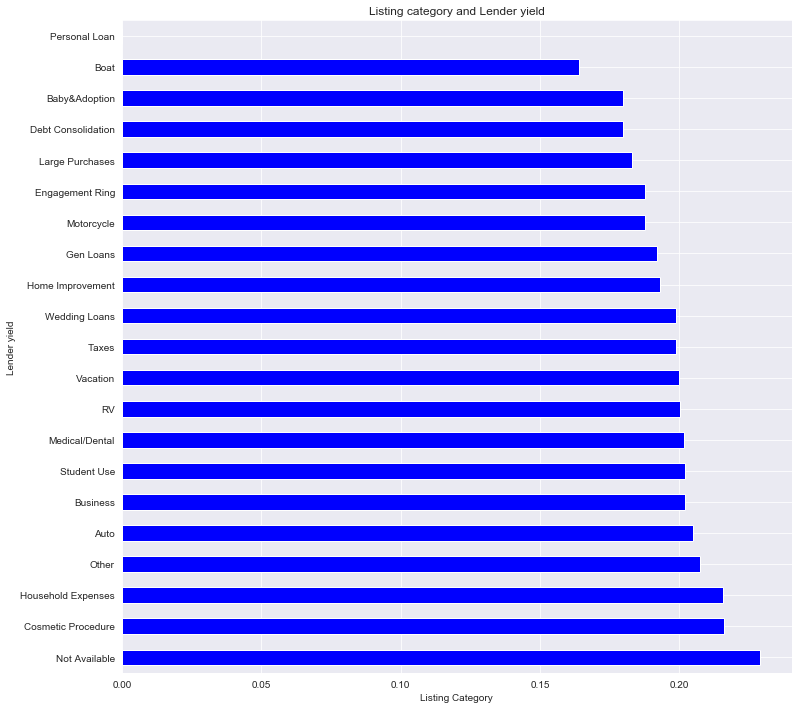

In [70]:
# Plot listing category and lender yield
cat_yield = prosper.groupby('ListingCategory').mean().LenderYield.sort_values(ascending=False)
plt.figure(figsize = [12, 12])
cat_yield.plot(kind="barh", color="blue")
plt.title('Listing category and Lender yield')
plt.xlabel('Listing Category')
plt.ylabel('Lender yield');

In Listing Category, Cosmetic proceedures have highest Lender yield and the lowest is boat while discounting Not availble

#### Now how about Lender yield and Principal borrowed

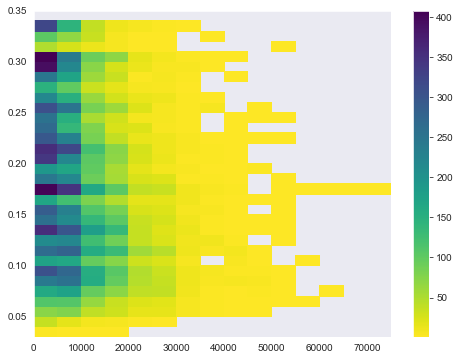

In [71]:
# Lets take a look at lenders yield and principal borrowed
plt.figure(figsize = [8, 6])
bins_x = np.arange(0, 72499+5000, 5000)
bins_y = np.arange(0.03, 0.34+0.01, 0.01)
plt.hist2d(data = prosper, x = 'ProsperPrincipalBorrowed', y = 'LenderYield',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar();

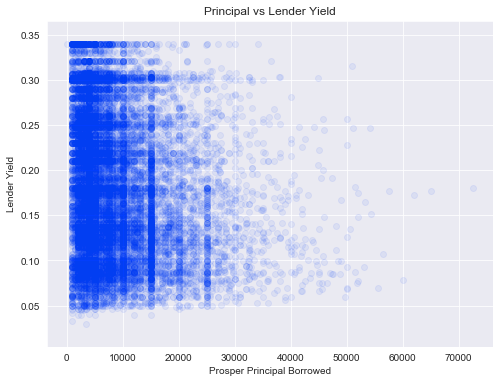

In [72]:
# Relationship between Principal  and Lender Yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='ProsperPrincipalBorrowed', y='LenderYield', alpha=1/15);
plt.xlabel('Prosper Principal Borrowed')
plt.ylabel('Lender Yield')
plt.title('Principal vs Lender Yield');

Most of total loans are below $30,000 and offer a variety of yields. 30 to 40k have a moderate amount of loans. The higher loans occur less often and have lower yields

#### What kind of yields are gotten from the loan amounts?

In [73]:
prosper.LoanOriginalAmount.describe()

count    82551.000000
mean      8960.651319
std       6193.989882
min       1000.000000
25%       4000.000000
50%       7500.000000
75%      13000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

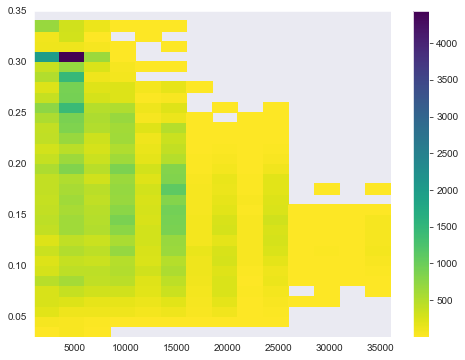

In [74]:
# Lets take a look at lenders yield and Original Loan Amount
plt.figure(figsize = [8, 6])
bins_x = np.arange(1000, 35000+2500, 2500)
bins_y = np.arange(0.03, 0.34+0.01, 0.01)
plt.hist2d(data = prosper, x = 'LoanOriginalAmount', y = 'LenderYield',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar();

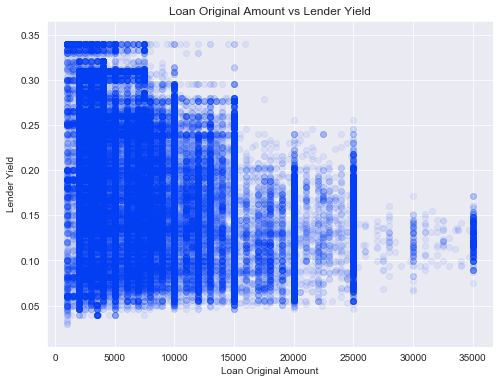

In [75]:
# Relationship between Loan Original Amount  and Lender Yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='LoanOriginalAmount', y='LenderYield', alpha=1/15);
plt.xlabel('Loan Original Amount')
plt.ylabel('Lender Yield')
plt.title('Loan Original Amount vs Lender Yield');

Lets do a log transform on the Loan Original Amount

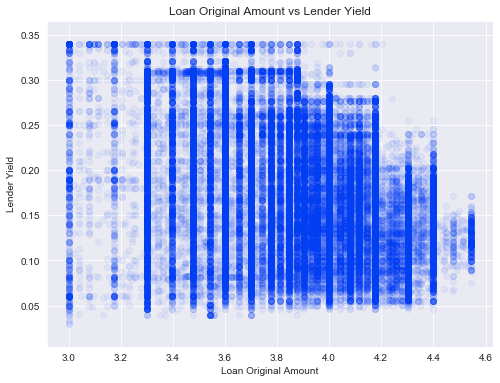

In [76]:
# Relationship between Loan Original Amount  and Lender Yield
plt.figure(figsize = [8, 6])
xlog_data = np.log10(prosper.LoanOriginalAmount)
#plt.scatter(data=twitter_archive_master, x=xlog_data, y=ylog_data, alpha = 1/5)
xlog_bin = np.arange(3, 4.5+0.5, 0.5)
plt.scatter(data=prosper, x=xlog_data, y='LenderYield', alpha=1/20);
plt.xlabel('Loan Original Amount')
plt.ylabel('Lender Yield')
plt.title('Loan Original Amount vs Lender Yield');

Most loan values are concentrated below 15k. The higher loans also have a lower yield than the smaller loans

#### How do the estimated Return and loss interact to the Lender yield?

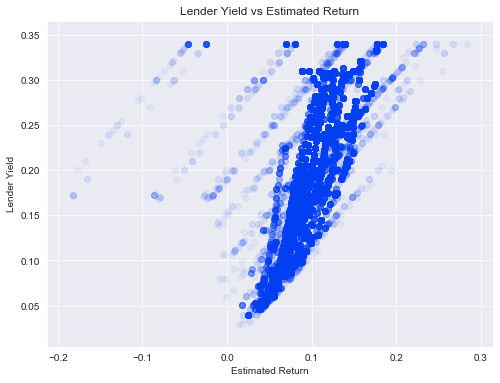

In [77]:
# Relationship between estimated return and lender yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='EstimatedReturn', y='LenderYield', alpha=1/20);
plt.xlabel('Estimated Return')
plt.ylabel('Lender Yield')
plt.title('Lender Yield vs Estimated Return');

Lender yield increases with an increase in estimated return

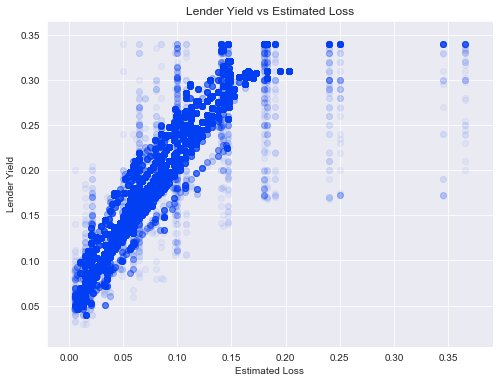

In [78]:
# Relationship between estimated return and lender yield
plt.figure(figsize = [8, 6])
plt.scatter(data=prosper, x='EstimatedLoss', y='LenderYield', alpha=1/20);
plt.xlabel('Estimated Loss')
plt.ylabel('Lender Yield')
plt.title('Lender Yield vs Estimated Loss');

As the lender yield increases the estimated loss also increase. They have a strong positive relationship

#### How does the lender yield fair over time?

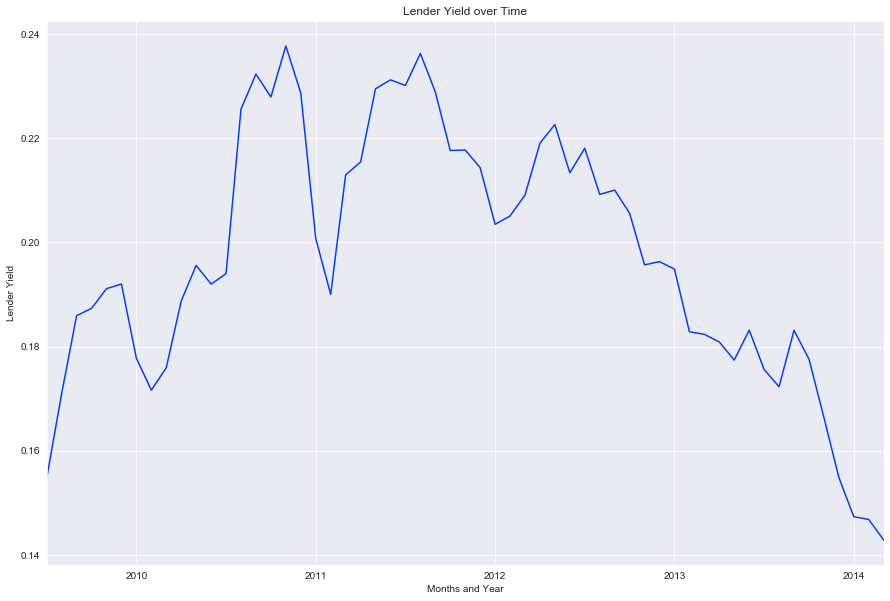

In [79]:
# Delinquencies by year
# Get number of tweets per month
month_yield = prosper.groupby(pd.Grouper(key='ListingCreationDate', freq='M')).mean().LenderYield
month_yield.plot(kind='line', figsize=(15,10))
plt.xlabel('Months and Year')
plt.ylabel('Lender Yield')
plt.title('Lender Yield over Time');

Lender continued rising with a few dips from before 2010 up to 2012. It kept dropping from 2012 up to 2014

### MULTIVARIATE ANALYSIS

#### Lets now add more variables to our analysis to get more answers

#### Loan Term?

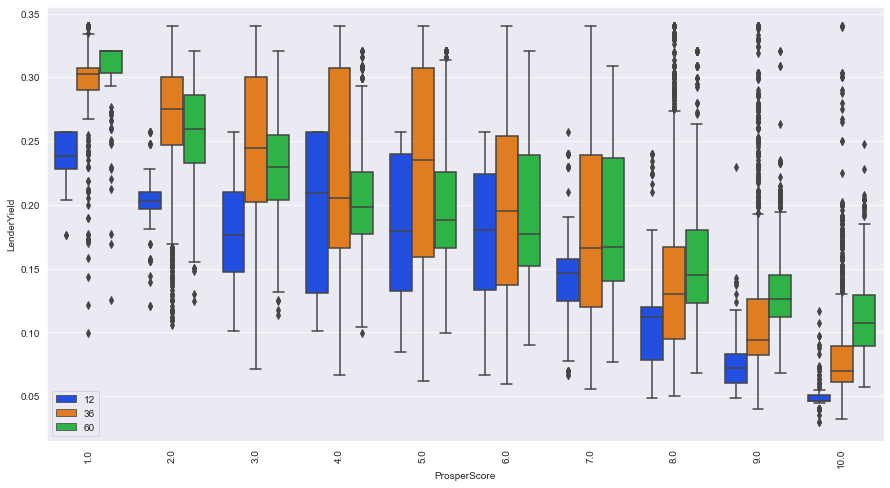

In [80]:
# Prosper score and Lender yield by Term
plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', hue= 'Term')
plt.xticks(rotation=90)
plt.legend(loc=0);

Prosper score bewteen 7 to 10, the best average yields are for those loans that are 60 months long. The majority of the outliers are also on the upside. For prosper scores 2, 3, 5 and 6, loans with 36 months tenure have better yields. Most of the outliers are on the lower side.  Its only Prosper score 4 that has the best yield on 12 month loans

#### How does home ownership affect the relationship between prosper score and Lender yield?

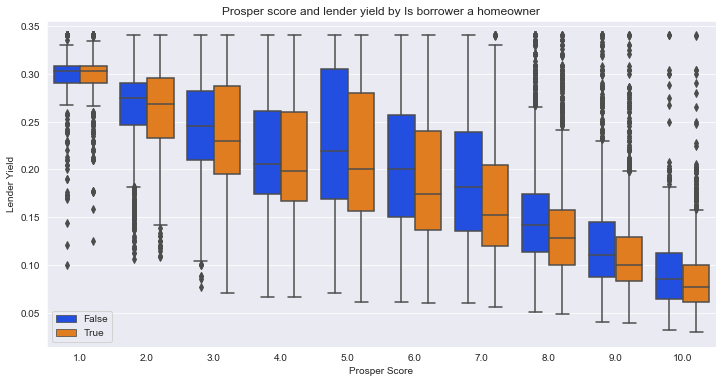

In [81]:
# Prosper score and lender yield by Is borrower a homeowner
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', hue= 'IsBorrowerHomeowner')
plt.xticks(rotation=0)
plt.xlabel('Prosper Score')
plt.ylabel('Lender Yield')
plt.title('Prosper score and lender yield by Is borrower a homeowner')
plt.legend(loc=0);

For every prosper score the average Lender yield is lower for homeowners. The only exception is the prosper score 1 where the homeowner loan has a higher average yield than the borrower without a home.

#### Lets see those in group

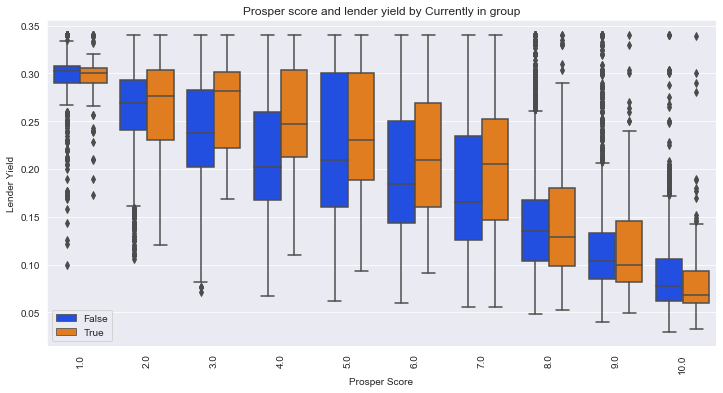

In [82]:
# Prosper score and lender yield by Currently in group
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosper, x = 'ProsperScore', y = 'LenderYield', hue= 'CurrentlyInGroup')
plt.xticks(rotation=90)
plt.legend(loc=0)
plt.xlabel('Prosper Score')
plt.ylabel('Lender Yield')
plt.title('Prosper score and lender yield by Currently in group');

The prosper score of 2 to 7, lenders yield is higher when the borrower is in a group. This is however different for all other prosper scores where those not in a group offer better yields for the lender.

#### Lets add prosper score to Loan amount and lender yield

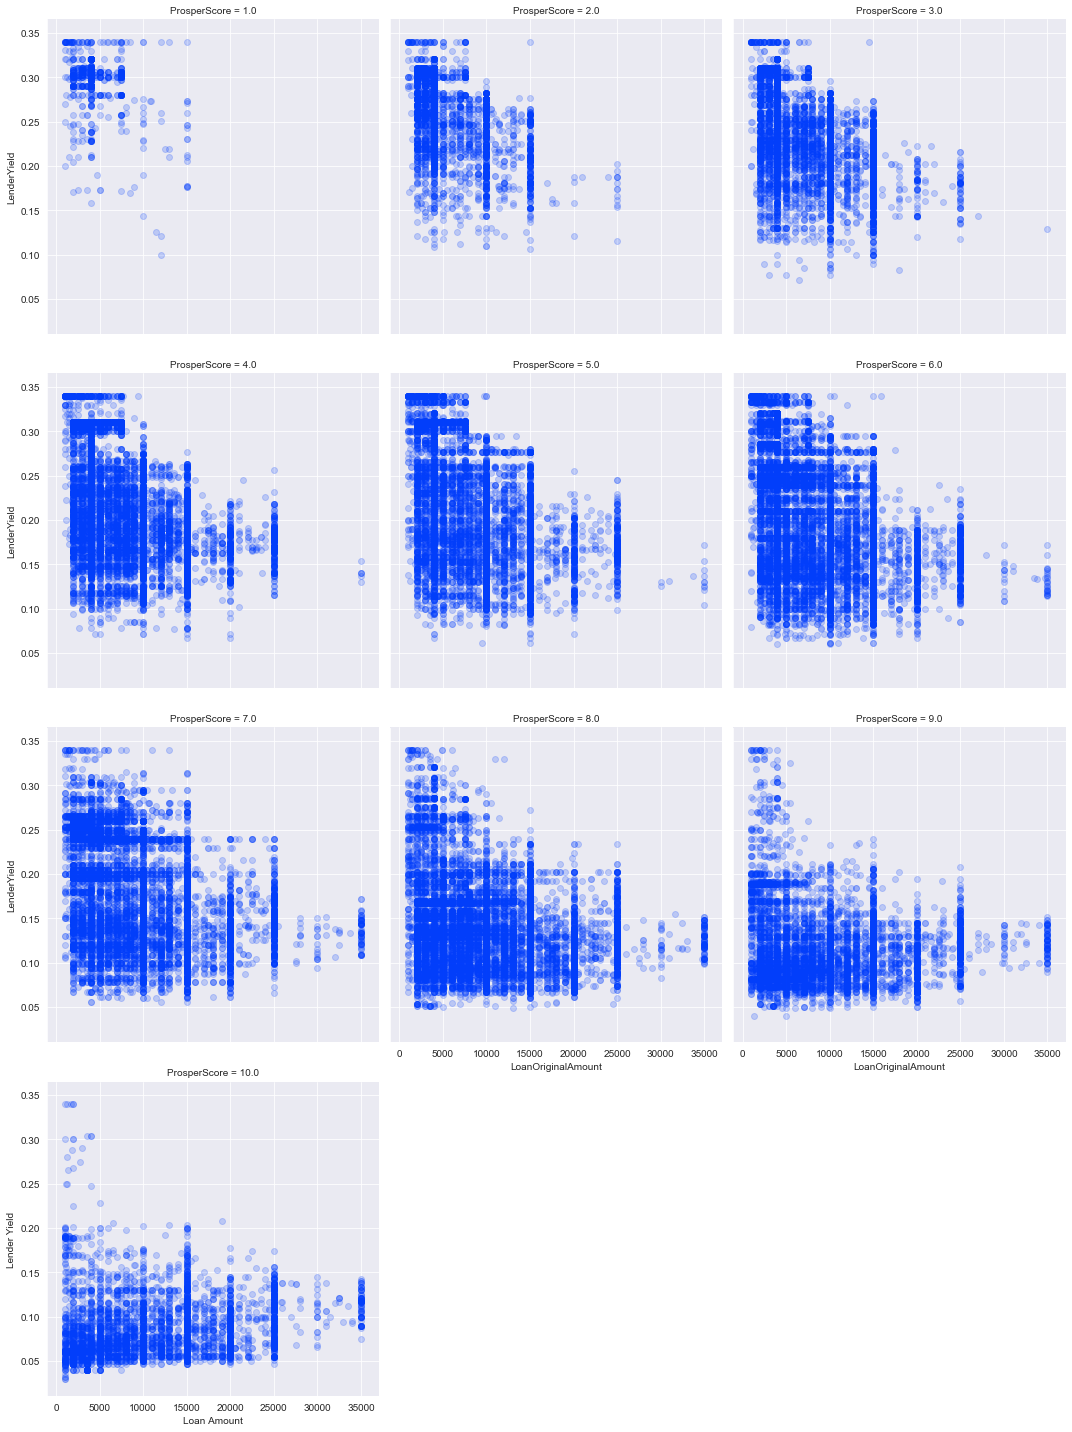

In [83]:
# Lets add Prosper score to the Relationship between Loan Amount and lender yield

g = sb.FacetGrid(data = prosper, col = 'ProsperScore', height = 5, col_wrap = 3, margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'LenderYield', alpha = 1/5);
plt.xlabel('Loan Amount')
plt.ylabel('Lender Yield');

The higher the prosper score the lower the lender yield and most lower loans are the most dominant

Prosper score, lender yield and Estimated Return

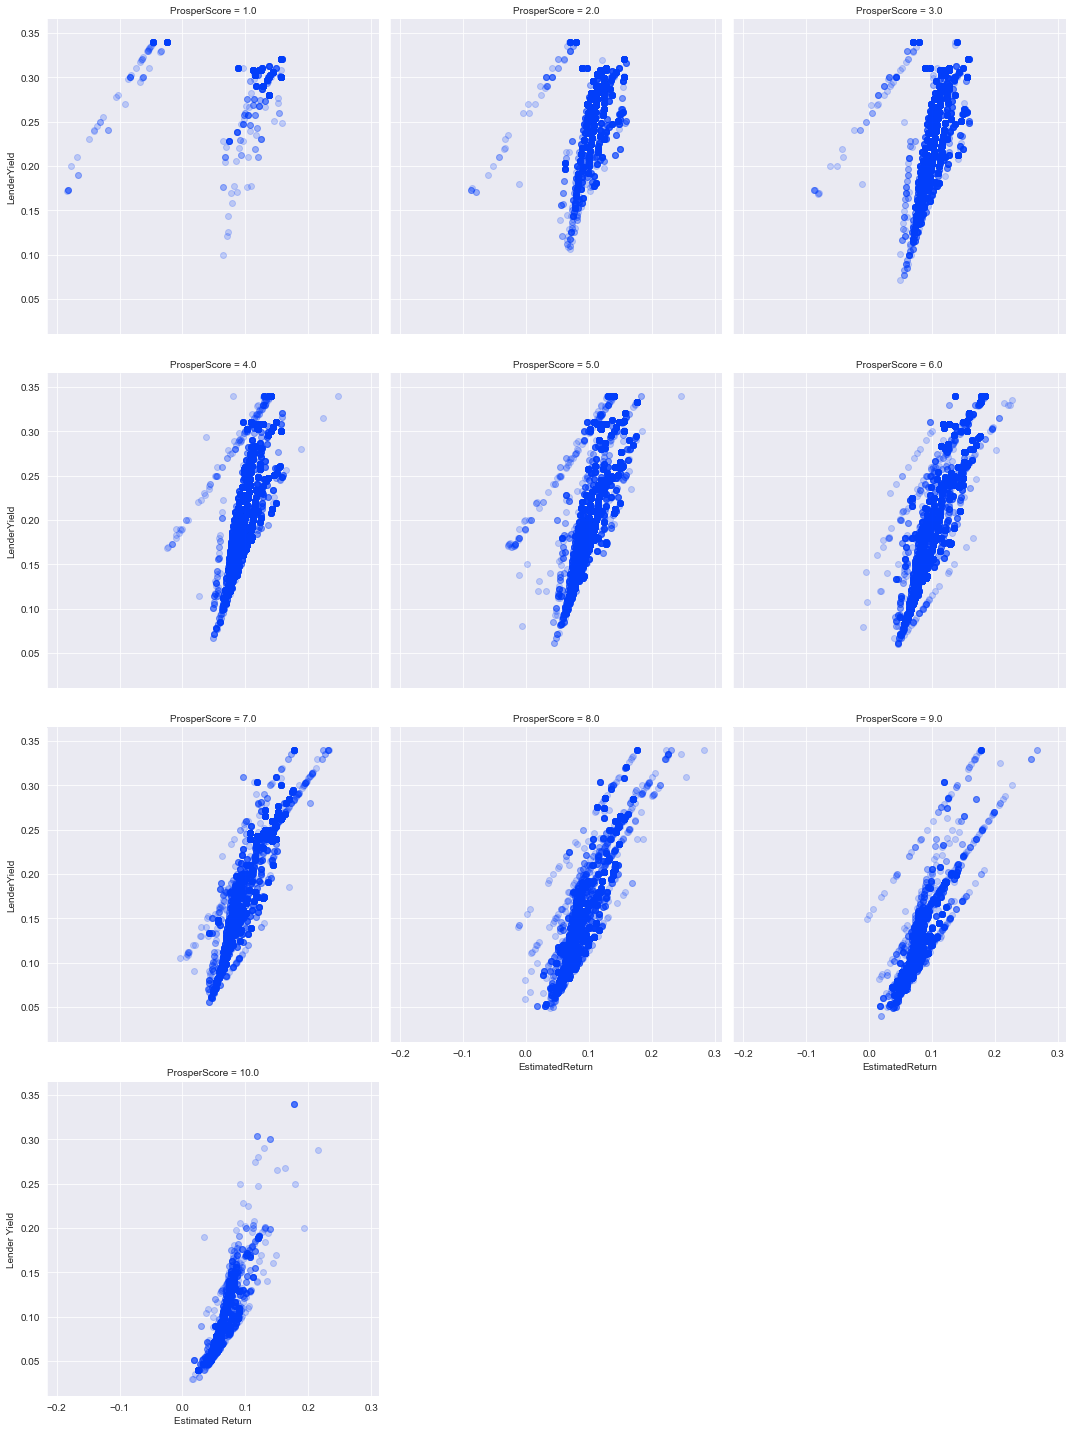

In [84]:
# Lets add Prosper score to the Relationship between estimated return and lender yield

g = sb.FacetGrid(data = prosper, col = 'ProsperScore', height = 5, col_wrap = 3, margin_titles = True)
g.map(plt.scatter, 'EstimatedReturn', 'LenderYield', alpha = 1/5);
plt.xlabel('Estimated Return')
plt.ylabel('Lender Yield');

The estimated return and the Lender yeild have a positive relationship. Its the same for all prosper scores

#### How do the Lender yield and Estimated Return perform year on year

In [85]:
# Lets get average monthly Lenders yield
month_yield = prosper.groupby(pd.Grouper(key='ListingCreationDate', freq='M')).mean().LenderYield

In [86]:
# Lets get average monthly Estimated return
month_return = prosper.groupby(pd.Grouper(key='ListingCreationDate', freq='M')).mean().EstimatedReturn

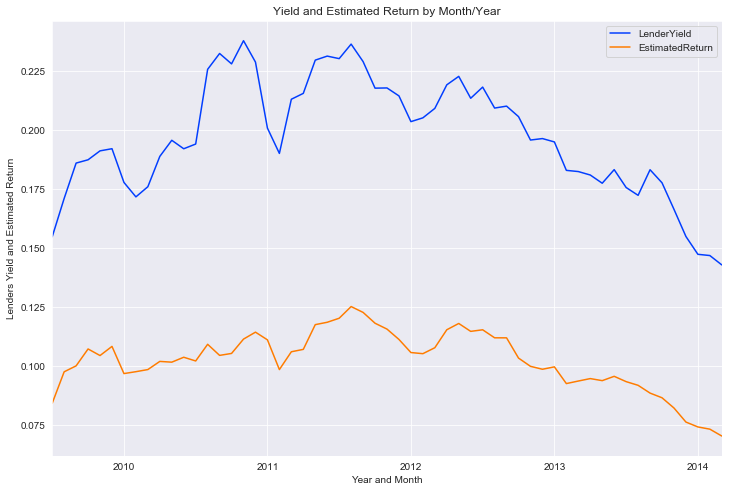

In [87]:
# Plot line chart for Yield and Estimated Return by Month/Year
plt.figure(figsize=(12, 8)) 
month_yield.plot(kind='line')
month_return.plot(kind='line')
plt.xlabel('Year and Month')
plt.ylabel('Lenders Yield and Estimated Return')
plt.legend();
plt.title('Yield and Estimated Return by Month/Year');

From the line chart the Lenders Yield is always higher than the estimated return for all the years plotted